<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


* Extract information from a given web site 
* Write the scraped data into a csv file.


## Extract information from the given web site
You will extract the data from the below web site: <br> 


In [1]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [2]:
# Your code here
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a webpage
import pandas as pd

Download the webpage at the url


In [3]:
#your code goes 
data  = requests.get(url).text

Create a soup object


In [4]:
#your code goes here
soup = BeautifulSoup(data,"html.parser")

Scrape the `Language name` and `annual average salary`.


In [5]:
#your code goes here
table = soup.find('table') 

language=[]
for row in table.find_all('tr'): # in html table row is represented by the tag <tr>
    # Get all columns in each row.
    cols = row.find_all('td') # in html a column is represented by the tag <td>
    Language_name = cols[1].getText() 
    Annual_average_salary = cols[3].getText() 
    print("{}--->{}".format(Language_name, Annual_average_salary))
    language.append([Language_name, Annual_average_salary])

Language--->Average Annual Salary
Python--->$114,383
Java--->$101,013
R--->$92,037
Javascript--->$110,981
Swift--->$130,801
C++--->$113,865
C#--->$88,726
PHP--->$84,727
SQL--->$84,793
Go--->$94,082


Save the scrapped data into a file named *popular-languages.csv*


In [6]:
# your code goes here



# Create a DataFrame and save it to a CSV file
dfpop = pd.DataFrame(language,columns=['Language name', 'annual average salary'])

dfpop.to_csv('popular-languages.csv')

# now print out the file:
df = pd.read_csv('popular-languages.csv', header=1) 
df

,0,Language,Average Annual Salary
0,1,Python,"$114,383"
1,2,Java,"$101,013"
2,3,R,"$92,037"
3,4,Javascript,"$110,981"
4,5,Swift,"$130,801"
5,6,C++,"$113,865"
6,7,C#,"$88,726"
7,8,PHP,"$84,727"
8,9,SQL,"$84,793"
9,10,Go,"$94,082"


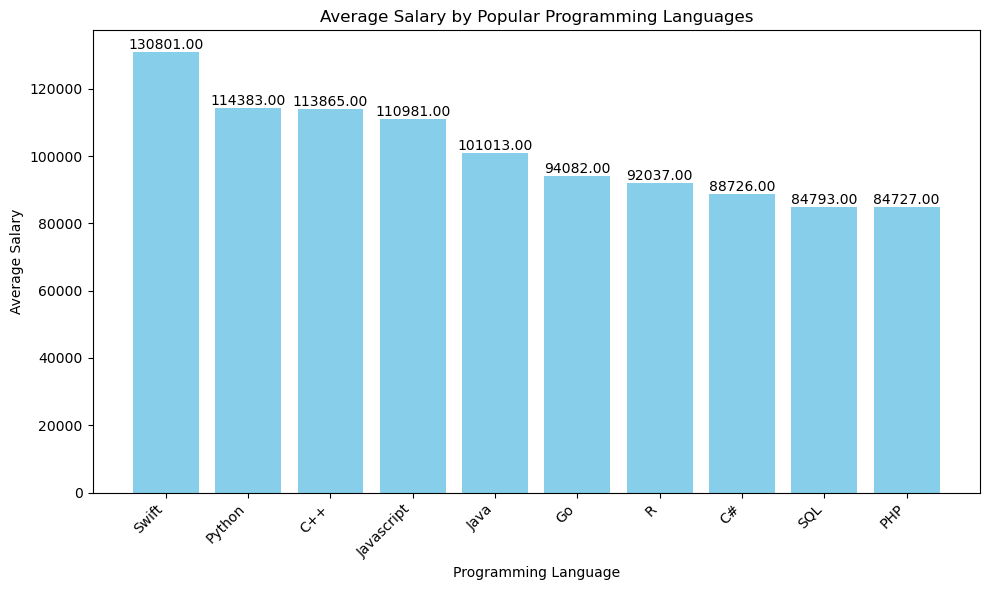

In [12]:

import matplotlib.pyplot as plt

df['Average Annual Salary'] = df['Average Annual Salary'].replace('[\$,]', '', regex=True).astype(float)

# Sort the DataFrame by Salary in descending order
df_sorted = df.sort_values(by='Average Annual Salary', ascending=False)

# Create a bar chart
plt.figure(figsize=(10, 6))
bars=plt.bar(df_sorted['Language'], df_sorted['Average Annual Salary'], color='skyblue')
plt.xlabel('Programming Language')
plt.ylabel('Average Salary')
plt.title('Average Salary by Popular Programming Languages')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
# Add data labels
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')
# Show the plot
plt.show()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01).
